# PROJECT INTEREST RATES

# INTEREST RATES NIELSON SIEGEL

In [ ]:
import requests
import json
import pandas as pd
import io

date_format = '%Y-%m-%d'
DATAFLOW = "YC"
FREQ = "B"  # Daily - businessweek
REF_AREA = "U2"  # Euro area (changing composition)
CURRENCY = "EUR"
PROVIDER_FM = "4F"  # ECB21,000 clips
INSTRUMENT_FM = "G_N_A"  # Government bond, nominal, all issuers whose rating is triple A
PROVIDER_FM_ID = "SV_C_YM"  # Svensson model - continuous compounding - yield error minimisation
DATA_TYPE_FM = "SR_1M+SR_3M+SR_6M+SR_9M+SR_1Y+SR_2Y+SR_3Y+SR_4Y+SR_5Y+SR_6Y+SR_7Y+SR_8Y+SR_9Y+SR_10Y+SR_11Y+SR_12Y+SR_13Y+SR_14Y+SR_15Y+SR_16Y+SR_17Y+SR_18Y+SR_19Y+SR_20Y+SR_21Y+SR_22Y+SR_23Y+SR_24Y+SR_25Y+SR_26Y+SR_27Y+SR_28Y+SR_29Y+SR_30Y"

url = f"https://data-api.ecb.europa.eu/service/data/{DATAFLOW}/{FREQ}.{REF_AREA}.{CURRENCY}.{PROVIDER_FM}.{INSTRUMENT_FM}.{PROVIDER_FM_ID}.{DATA_TYPE_FM}"
0.04
response = requests.get(url, headers={'Accept': 'text/csv'})
response.raise_for_status()
df = pd.read_csv(io.StringIO(response.text), parse_dates=['TIME_PERIOD'], index_col=['TIME_PERIOD'])

In [ ]:
df = df[["KEY", "OBS_VALUE"]].pivot(columns="KEY", values="OBS_VALUE")
date_format = '%Y-%m-%d'
df.index = df.index.strftime(date_format)
df.index.names = ['Date']
df.reset_index

<bound method DataFrame.reset_index of KEY         YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_10Y  \
Date                                              
2004-09-06                             4.209220   
2004-09-07                             4.209626   
2004-09-08                             4.228419   
2004-09-09                             4.161872   
2004-09-10                             4.120981   
...                                         ...   
2025-04-04                             2.647552   
2025-04-07                             2.681525   
2025-04-08                             2.753227   
2025-04-09                             2.686595   
2025-04-10                             2.677669   

KEY         YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_11Y  \
Date                                              
2004-09-06                             4.303296   
2004-09-07                             4.301520   
2004-09-08                             4.318705   
2004-09-09                             4.255025   
2004-09-10                             4.215890   
...                                         ...   
2025-04-04                             2.723060   
2025-04-07                             2.759158   
2025-04-08                             2.832744   
2025-04-09                             2.764303   
2025-04-10                             2.750190   

KEY         YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_12Y  \
Date                                              
2004-09-06                             4.385283   
2004-09-07                             4.381744   
2004-09-08                             4.397466   
2004-09-09                             4.336578   
2004-09-10                             4.298915   
...                                         ...   
2025-04-04                             2.786505   
2025-04-07                             2.824169   
2025-04-08                             2.899810   
2025-04-09                             2.829324   
2025-04-10                             2.810791   

KEY         YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_13Y  \
Date                                              
2004-09-06                             4.457110   
2004-09-07                             4.452132   
2004-09-08                             4.466525   
2004-09-09                             4.408313   
2004-09-10                             4.371898   
...                                         ...   
2025-04-04                             2.839032   
2025-04-07                             2.877853   
2025-04-08                             2.955367   
2025-04-09                             2.882988   
2025-04-10                             2.860632   

KEY         YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_14Y  \
Date                                              
2004-09-06                             4.520365   
2004-09-07                             4.514199   
2004-09-08                             4.527387   
2004-09-09                             4.471709   
2004-09-10                             4.436361   
...                                         ...   
2025-04-04                             2.881794   
2025-04-07                             2.921468   
2025-04-08                             3.000470   
2025-04-09                             2.926564   
2025-04-10                             2.900858   

KEY         YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_15Y  \
Date                                              
2004-09-06                             4.576354   
2004-09-07                             4.569196   
2004-09-08                             4.581290   
2004-09-09                             4.527995   
2004-09-10                             4.493569   
...                                         ...   
2025-04-04                             2.915886   
2025-04-07                             2.956181   
2025-04-08                             3.036183   
2025-04-09                             2.961219   
2025-04-10                   

In [ ]:
df.columns = [x.split("_")[-1] for x in df.columns]
df.columns = [x.split("Y")[0] for x in df.columns]
df = df.rename(columns = {'3M' : 0.25, '6M': 0.5, '9M':0.75})
df.columns = [float(x) for x in df.columns]

In [ ]:
df = df.sort_index(axis = 1)

In [ ]:
df

,0.25,0.50,0.75,1.00,2.00,3.00,4.00,5.00,6.00,7.00,...,21.00,22.00,23.00,24.00,25.00,26.00,27.00,28.00,29.00,30.00
Date,,,,,,,,,,,,,,,,,,,,,
2004-09-06,2.034172,2.121920,2.210407,2.298838,2.641262,2.951578,3.223235,3.457222,3.657429,3.828505,...,4.808953,4.836016,4.860795,4.883558,4.904536,4.923925,4.941896,4.958596,4.974153,4.988680
2004-09-07,2.040893,2.138822,2.234922,2.328891,2.679766,2.987293,3.252486,3.479518,3.673463,3.839294,...,4.798185,4.824870,4.849308,4.871763,4.892459,4.911590,4.929323,4.945804,4.961158,4.975495
2004-09-08,2.044384,2.148064,2.248871,2.346666,2.706542,3.016998,3.282196,3.507894,3.699959,3.863753,...,4.805488,4.831593,4.855497,4.877459,4.897700,4.916408,4.933749,4.949863,4.964876,4.978894
2004-09-09,2.037111,2.128935,2.219696,2.308988,2.646224,2.945649,3.206136,3.430628,3.623456,3.789113,...,4.763395,4.790922,4.816145,4.839332,4.860711,4.880479,4.898808,4.915844,4.931719,4.946545
2004-09-10,2.034645,2.111976,2.191267,2.271566,2.589654,2.884699,3.146724,3.374729,3.571385,3.740559,...,4.732636,4.760578,4.786181,4.809716,4.831415,4.851478,4.870080,4.887372,4.903483,4.918530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-04,2.197499,2.088007,2.002110,1.936384,1.821522,1.852520,1.952908,2.080840,2.214013,2.341075,...,2.988424,2.985048,2.978683,2.969737,2.958569,2.945500,2.930812,2.914758,2.897559,2.879414
2025-04-07,2.185478,2.065690,1.972875,1.902910,1.787863,1.830718,1.945028,2.085286,2.228258,2.362719,...,3.029578,3.026041,3.019461,3.010249,2.998774,2.985359,2.970294,2.953835,2.936209,2.917617
2025-04-08,2.136949,2.065831,2.010330,1.968456,1.904877,1.949675,2.050652,2.176419,2.308517,2.436475,...,3.105748,3.100359,3.091713,3.080268,3.066430,3.050557,3.032967,3.013942,2.993729,2.972548


### Nielsen Siegel

$$y(t) = \beta_0 + \beta_1 \frac{1 - e^{\frac{-t}{\lambda}}}{\frac{t}{\lambda}} + \beta_2\left(\frac{1 - e^{\frac{-t}{\lambda}}}{\frac{t}{\lambda}} + e^{\frac{-t}{\lambda}}\right) $$

In [ ]:
def nielsen_siegel(t, beta0, beta1, beta2, lamb_da):
    term1 = (1 - np.exp(-t / lamb_da) )/ (t / lamb_da)
    term2 = term1 - np.exp(-t / lamb_da)
    y_t = beta0 + beta1 * term1 + beta2 * term2
    return y_t

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
maturity = [0.25, 0.5, 0.75] + [i for i in range(1,31)]
rates = list(df.tail(1).values[0]/100)

param, _ = curve_fit(nielsen_siegel, maturity, rates, [1.2, 1.4, -0.9, 1.54])

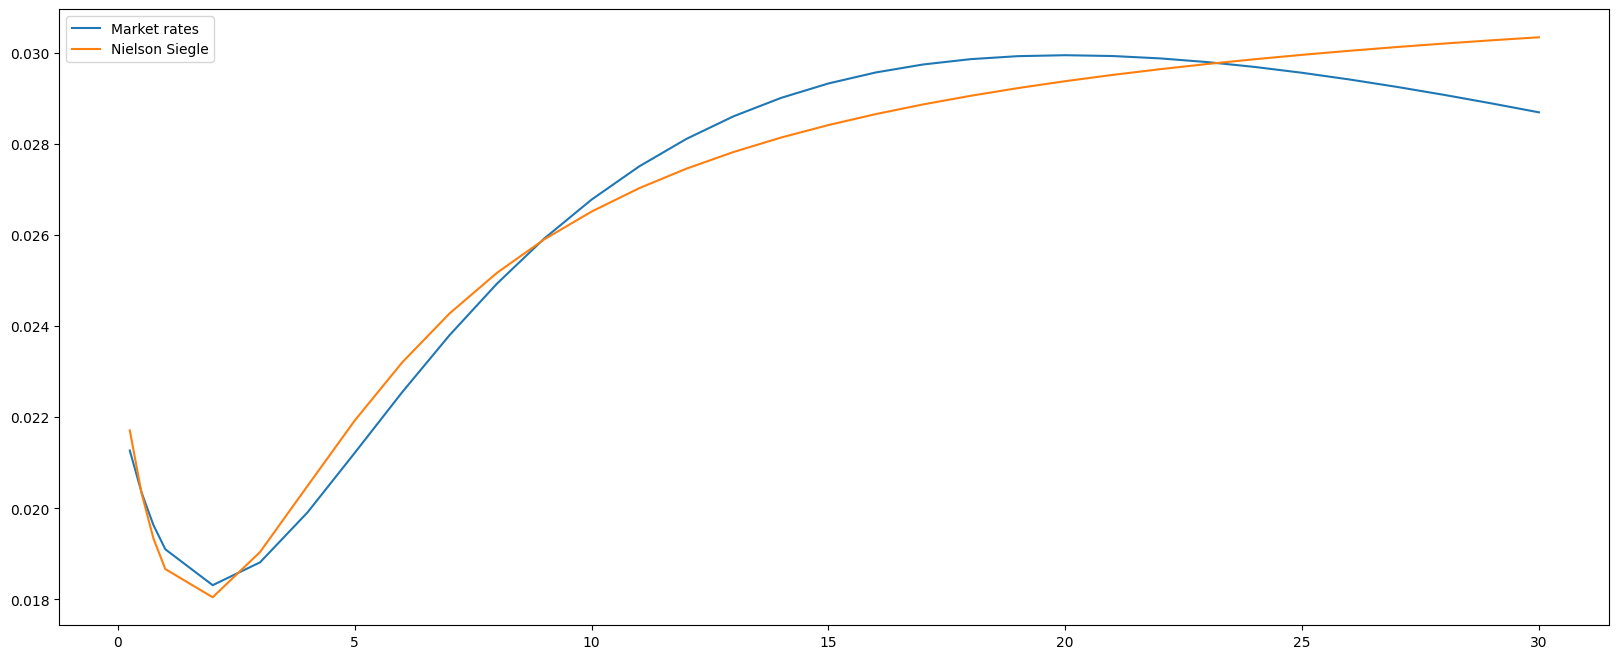

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 8))
plt.plot(df.columns, rates, label = "Market rates")
NS = [nielsen_siegel(i, param[0], param[1], param[2], param[3] ) for i in maturity]
plt.plot(df.columns, NS, label = "Nielson Siegle")
plt.legend()
plt.show()

In [ ]:
print(f"Optimal paramters : beta0 : {param[0]}, beta1 : {param[1]}, beta2 : {param[2]}, lamb_da : {param[3]}")

Optimal paramters : beta0 : 0.0322664212814817, beta1 : -0.008673234544370021, beta2 : -0.03283276499539279, lamb_da : 1.3930175151531434


# SWAP

FRA formula :

$$FRA(t) = \frac{1}{\tau(T, S)} \left(\frac{P(t,T)}{P(t,S)} - 1\right)$$

In [ ]:
from scipy.optimize import minimize

class swap:

  def __init__(self, tenor, rates):
    self.tenor = tenor
    self.rates = rates

  def fixed_leg(self, frequency, coupon):
    T = np.array([i*frequency for i in range(0, int(self.tenor/frequency)+1)][1:])
    maturity = self.rates.columns
    tx = list(self.rates.tail(1).values[0])
    rate_grid = np.array(np.interp(T, maturity, tx))
    fixed_leg = np.sum(np.exp(- rate_grid/100 * T )) * frequency * coupon / 100
    return fixed_leg

  def floating_leg(self, frequency):
    T = np.array([i*frequency for i in range(0, int(self.tenor/frequency)+1)][1:])
    maturity = self.rates.columns
    tx = list(self.rates.tail(1).values[0])
    rate_grid = np.array(np.interp(T, maturity, tx))
    FRA = 1/frequency * (np.exp(- rate_grid[:-1]/100 * T[:-1])/ np.exp(- rate_grid[1:]/100 * T[1:]) - 1 )
    floating_leg = np.sum(np.exp(- rate_grid[1:]/100 * T[1:] ) * FRA*frequency )
    return floating_leg

  def swap_rate(self, frequency, coupon):
    floating_leg_i = self.floating_leg(frequency)
    fixed_leg_i = self.fixed_leg(frequency, coupon)
    return abs(floating_leg_i - fixed_leg_i)

  def find_swap_rate(self, frequency, initial_guess=0.03):
      """Find the swap rate (coupon) that minimizes the absolute difference."""
      objective = lambda coupon: self.swap_rate(frequency, coupon)
      result = minimize(objective, x0=[initial_guess], method='Nelder-Mead')
      return result.x[0]

  def analytical_swap_rate(self, frequency):
    floating_leg_i = self.floating_leg(frequency)
    T = np.array([i*frequency for i in range(0, int(self.tenor/frequency)+1)][1:])
    maturity = self.rates.columns
    tx = list(self.rates.tail(1).values[0])
    rate_grid = np.array(np.interp(T, maturity, tx))
    coupon =  floating_leg_i /(np.sum(np.exp(- rate_grid/100 * T )) * frequency)
    return coupon * 100


### SWAP PRICER

In [ ]:
rates = df.tail(1) # rate curves
tenor = 10
frequency = 0.5
coupon = 2

swap1 = swap(tenor, rates)
leg_fix = swap1.fixed_leg(frequency, coupon)
leg_float = swap1.floating_leg(frequency)
price_swap = leg_fix - leg_float
price_swap

np.float64(-0.047433045280330294)

### FIND SWAP RATE

In [ ]:
rates = df.tail(1) # rate curves
tenor = 10
frequency = 0.5
coupon = 2

swap1 = swap(tenor, rates)
swap1.find_swap_rate(frequency, initial_guess = 1)

np.float64(2.5348632812500034)

### FIND ANALYTICAL SWAP RATE

In [ ]:
rates = df.tail(1) # rate curves
tenor = 10
frequency = 0.5
coupon = 2

swap1 = swap(tenor, rates)
swap1.analytical_swap_rate(frequency)

np.float64(2.5348749900719114)

# HULL WHITE SHORT RATE MODEL

$$dr_t = (\theta(t) - ar_t)dt + \sigma dW_t$$

with
$$\theta(t) = a \beta_0 + \beta_1 (a \lambda - 1) \frac{e^{-\frac{t}{\lambda}}}{\lambda} + \beta_2\left(1 + at - \frac{t}{\lambda}\right)\frac{e^{-\frac{t}{\lambda}}}{\lambda} + \frac{\sigma^2}{2a}\left(1 - e^{-2at}\right)$$




In [ ]:
def MC_hull_white(nb_simulations, r0, a, sigma, steps, beta0, beta1, beta2, lamb_da, T):
  Rates = np.zeros((nb_simulations, steps))
  Rates[:, 0] = r0
  dt = T/steps
  for i in range(1, steps):

      first_term = (a * lamb_da - 1) * np.exp(-i * dt/lamb_da)/lamb_da
      second_term = (1 + a * i * dt - (i * dt)/lamb_da) * np.exp(- i * dt/lamb_da)/lamb_da
      third_term = sigma**2/(2 * a) * (1 - np.exp(-2 * a * i * dt))

      teta = a * beta0 + beta1 * first_term + beta2 * second_term + third_term
      dr = (teta - a * Rates[:, i-1]) * dt + sigma * np.sqrt(dt) * np.random.normal(size=nb_simulations)
      Rates[:, i] = Rates[:, i-1] + dr

  return Rates

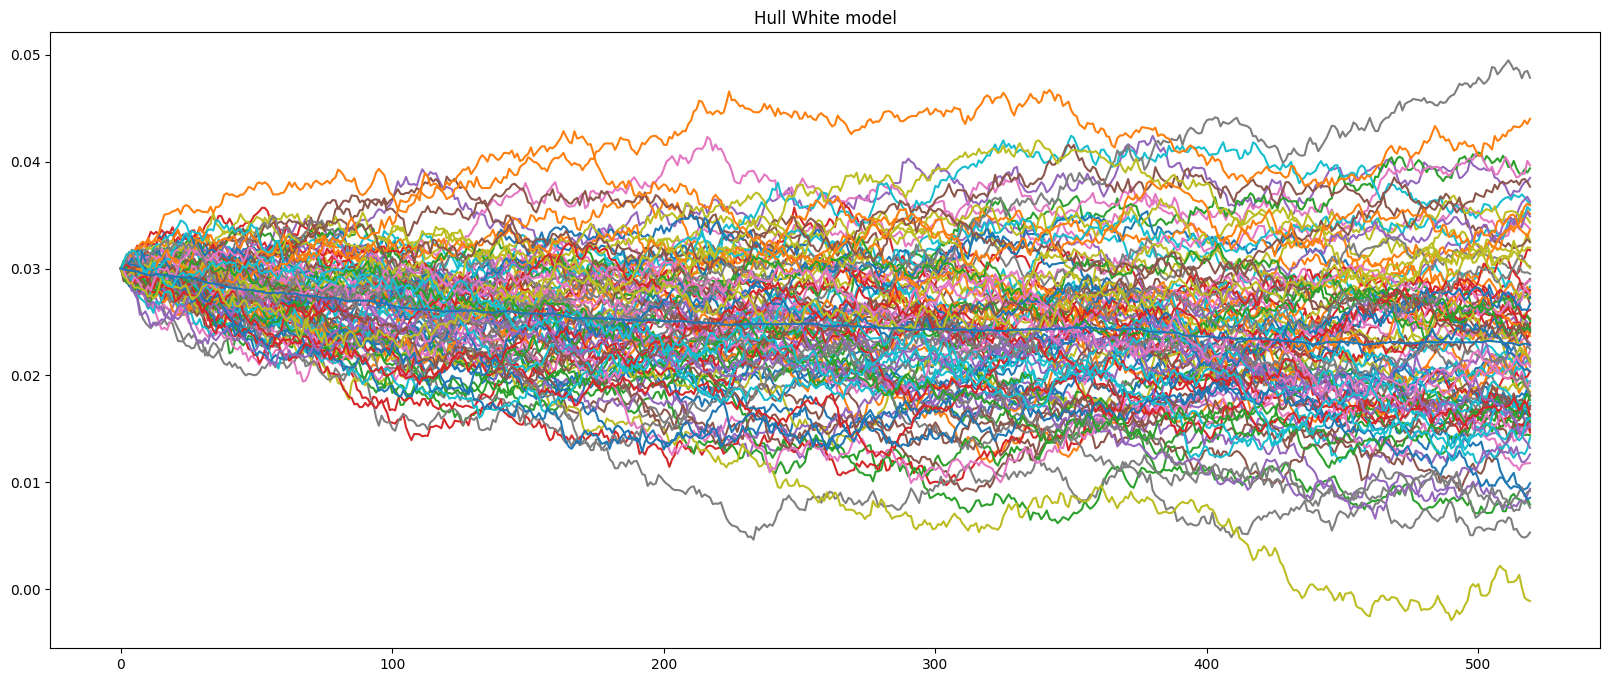

In [ ]:
r0 = 0.03
sigma = 0.01
tenor = 10
frequency = 1
k = 2 # %
T = 1

nb_simulations = 100
steps = 520

a = 0.1

beta0, beta1, beta2, lamb_da = param

R = MC_hull_white(nb_simulations, r0, a, sigma, steps, beta0, beta1, beta2, lamb_da, T)
plt.figure(figsize=(20, 8))
for j in range(nb_simulations):
  plt.plot(R[j,:])
plt.plot(np.mean(R, axis = 0))
plt.title('Hull White model')
plt.show()

# FORMULA ZERO COUPON HULL WHITE

$$P(t, T) = A(t,T)e^{\Phi(t,T) r(t)}$$

With :

$$A(t, T) = \frac{P^M(0,T)}{P^M(0,t)}exp\left(\Phi(t,T)f^M(0,T) + \frac{\sigma^2}{4a}(1-e^{-2at})\Phi(t,T)^2\right)$$

and :

$$\Phi(t,T) = \frac{1}{a}\left(1 - e^{-a(T-t)}\right)$$

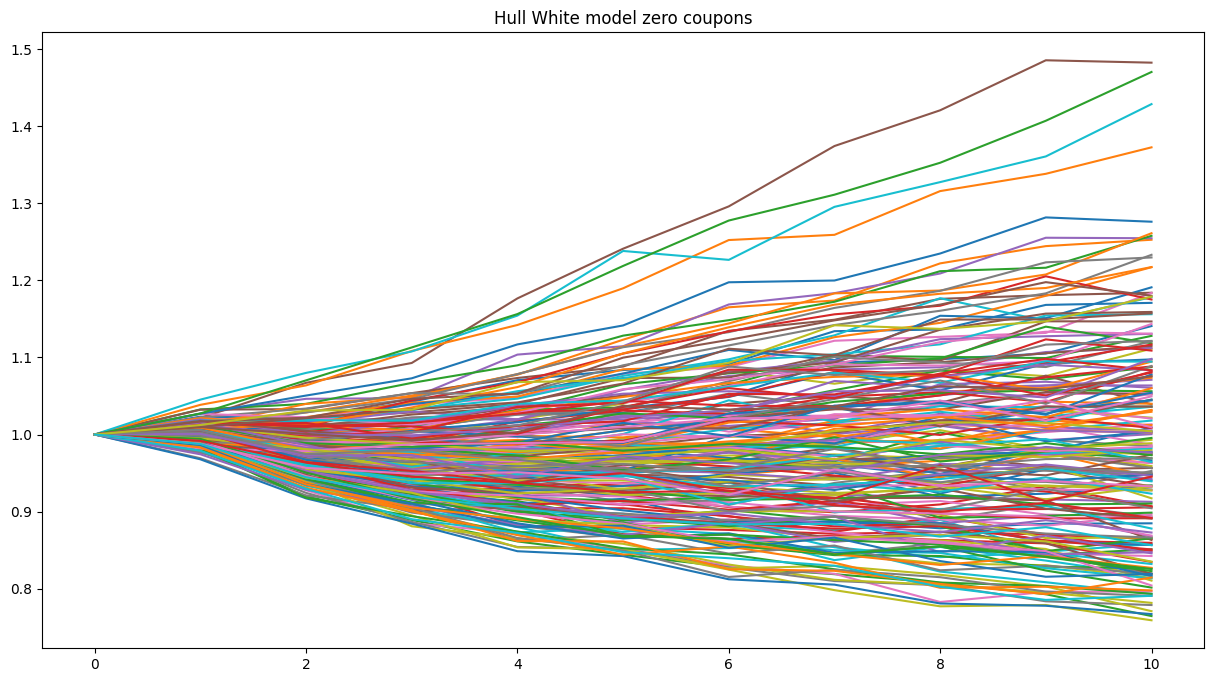

In [ ]:
r0 = 0.03
sigma = 0.01

nb_simulations = 200
steps = 1000

T = 10
a = 0.1

epsilon = 10**-8

beta0, beta1, beta2, lamb_da = param

R = MC_hull_white(nb_simulations, r0, a, sigma, steps, beta0, beta1, beta2, lamb_da, T) # Simulations des taux sous HW
# R = -R
Ts = range(11) # annual payment frequency
P_0_T = np.exp(- np.sum( R / steps, axis = 1)) # P(0, t)
# P_0_T = np.exp(-nielsen_siegel(T, beta0, beta1, beta2, lamb_da) * T)
zero_coupon = np.zeros((nb_simulations, len(Ts)))
zero_coupon[:,0] = 1

for k, i  in enumerate(Ts):
  if k != len(Ts)-1:
    phi = 1/a * (1 - np.exp(-a * i))
    f = beta0 + np.exp(-i/lamb_da)*(beta1 + beta2 * i/lamb_da)
    RR = MC_hull_white(nb_simulations , r0, a, sigma, steps, beta0, beta1, beta2, lamb_da, i)
    P_0_t = np.exp(- np.sum( RR / steps, axis = 1))
    # P_0_t = np.exp(-nielsen_siegel(i, beta0, beta1, beta2, lamb_da) * i)

    A = (P_0_T/P_0_t) * (np.exp(phi * f - sigma**2/(4 * a) * (1 - np.exp(-2 * a * i)) * phi**2))
    zero_coupon[:, k + 1] = A * np.exp(-phi * R[:, -1])

plt.figure(figsize=(15, 8))
for j in range(nb_simulations):
  plt.plot(zero_coupon[j,:])
plt.title('Hull White model zero coupons')
plt.show()

# CAP

## CAP MONTE CARLO VALUATION

$$\text{Price} = \mathbb{E}\left[ e^{- \int_0^S r(t) \, dt} \text{Payoff}\right]
$$

In [ ]:
# FRAs
FRA = 1/1 * (zero_coupon[:, 1:]/zero_coupon[:, :-1] - 1)
FRA[0]

array([ 0.02317691, -0.00204885,  0.02103571,  0.02682288,  0.01225413,
        0.00719042,  0.03910767,  0.00187186,  0.02812746,  0.00224898])

In [ ]:
K = 0.02
Payoff = np.maximum(0, K - FRA)
Payoff.shape

(200, 10)

In [ ]:
DISCOUNT = []
epsilon = 10**-8

for i in range(1, T+1):
  discount = np.exp(-np.sum(R[:, 0:int(i * steps/T)-1]/(i * steps/T ), axis = 1))
  DISCOUNT.append(discount)
DISCOUNT = np.array(DISCOUNT).T
DISCOUNT.shape

(200, 10)

In [ ]:
DISCOUNT[0]

array([0.9739796 , 0.9793454 , 0.98207589, 0.98383204, 0.98563768,
       0.98877032, 0.99095861, 0.99235894, 0.99338202, 0.99294565])

In [ ]:
Price = np.mean(DISCOUNT * Payoff)
print(f"Price of the CAP with Monte Carlo simulation : {Price}")

Price of the CAP with Monte Carlo simulation : 0.022781056671556006


## CAP UNDER T FORWARD MEASURE

In [ ]:
def MC_hull_white_t_forward(nb_simulations, r0, a, sigma, steps, beta0, beta1, beta2, lamb_da, T):
  Rates = np.zeros((nb_simulations, steps))
  Rates[:, 0] = r0
  dt = T/steps
  for i in range(1, steps):

      first_term = (a * lamb_da - 1) * np.exp(-i * dt/lamb_da)/lamb_da
      second_term = (1 + a * i * dt - (i * dt)/lamb_da) * np.exp(- i * dt/lamb_da)/lamb_da
      third_term = sigma**2/(2 * a) * (1 - np.exp(-2 * a * i * dt))

      teta = a * beta0 + beta1 * first_term + beta2 * second_term + third_term

      phi = 1/a * (1 - np.exp(-a * i))

      drift_adjust = sigma**2 * phi
      dr = (teta - a * Rates[:, i-1] - drift_adjust) * dt + sigma * np.sqrt(dt) * np.random.normal(size=nb_simulations)
      Rates[:, i] = Rates[:, i-1] + dr

  return Rates

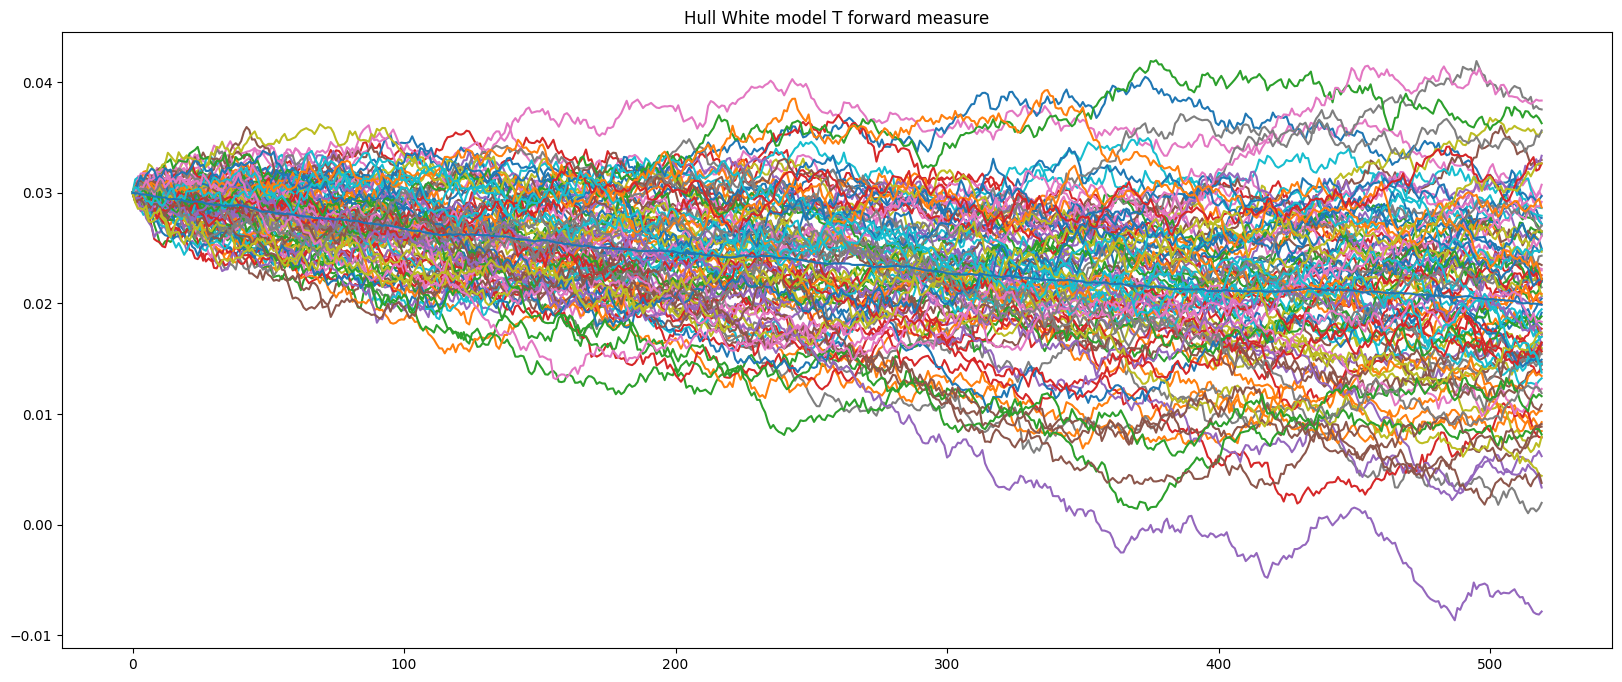

In [ ]:
r0 = 0.03
sigma = 0.01
tenor = 10
frequency = 1
k = 2 # %
T = 1

nb_simulations = 100
steps = 520

a = 0.1

beta0, beta1, beta2, lamb_da = param

R = MC_hull_white_t_forward(nb_simulations, r0, a, sigma, steps, beta0, beta1, beta2, lamb_da, T)
plt.figure(figsize=(20, 8))
for j in range(nb_simulations):
  plt.plot(R[j,:])
plt.plot(np.mean(R, axis = 0))
plt.title('Hull White model T forward measure')
plt.show()

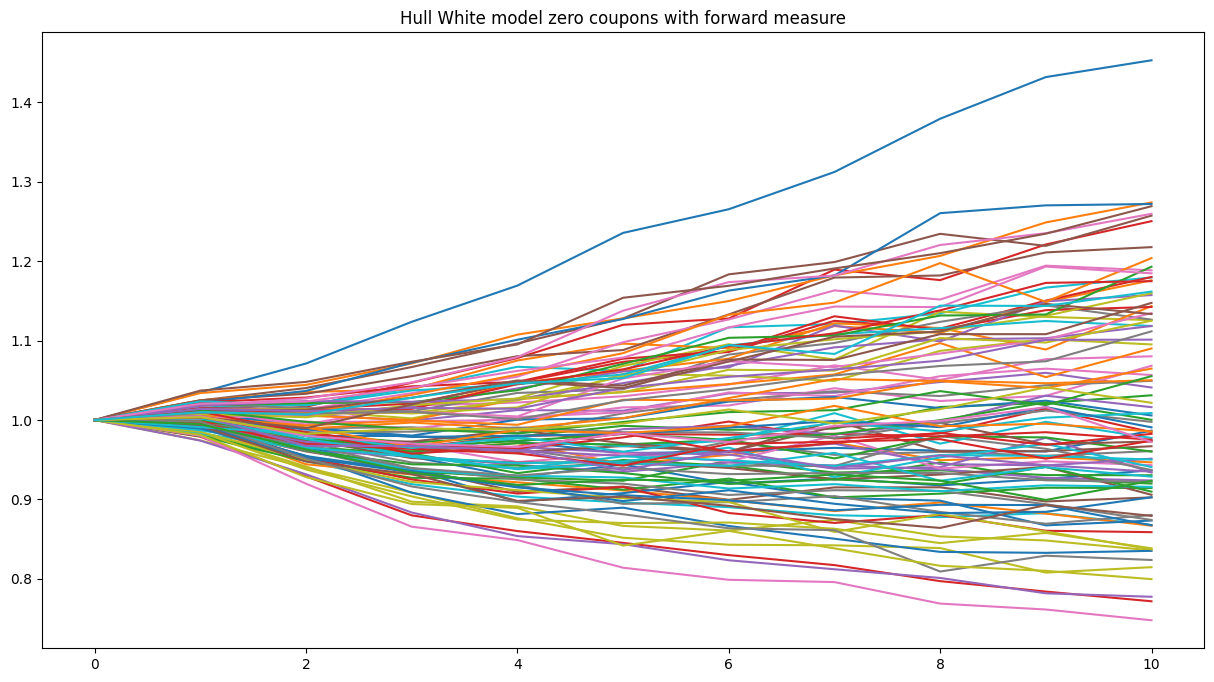

In [ ]:
r0 = 0.03
sigma = 0.01

nb_simulations = 100
steps = 1000

T = 10
a = 0.1

beta0, beta1, beta2, lamb_da = param

R = MC_hull_white_t_forward(nb_simulations, r0, a, sigma, steps, beta0, beta1, beta2, lamb_da, T) # Simulations des taux sous HW
# R = -R
Ts = range(11) # annual payment frequency
P_0_T = np.exp(- np.sum( R / steps, axis = 1)) # P(0, T)
# P_0_T = np.exp(-nielsen_siegel(T, beta0, beta1, beta2, lamb_da) * T)
zero_coupon = np.zeros((nb_simulations, len(Ts)))
zero_coupon[:,0] = 1

for k, i  in enumerate(Ts):
  if k != len(Ts)-1:
    phi = 1/a * (1 - np.exp(-a * i))
    f = beta0 + np.exp(-i/lamb_da)*(beta1 + beta2 * i/lamb_da)
    RR = MC_hull_white(nb_simulations , r0, a, sigma, steps, beta0, beta1, beta2, lamb_da, i)
    P_0_t = np.exp(- np.sum( RR / steps, axis = 1))
    # P_0_t = np.exp(-nielsen_siegel(i, beta0, beta1, beta2, lamb_da) * i )
    A = (P_0_T/P_0_t) * np.exp(phi * f - sigma**2/(4 * a) * (1 - np.exp(-2 * a * i)) * phi**2)
    zero_coupon[:, k + 1] = A * np.exp(-phi * R[:, -1])

plt.figure(figsize = (15,8))
for j in range(nb_simulations):
  plt.plot(zero_coupon[j,:])
plt.title('Hull White model zero coupons with forward measure')
plt.show()

In [ ]:
FRA = 1/1 * (zero_coupon[:, 1:]/zero_coupon[:, :-1] - 1)
K = 0.02
Payoff = np.maximum(0, K - FRA)
DISCOUNT = []
for i in range(1, T+1):
  discount = np.exp(-np.sum(R[:, 0:int(i * steps/T)-1]/(i * steps/T), axis = 1))
  DISCOUNT.append(discount)
DISCOUNT = np.array(DISCOUNT).T
Price = np.mean(DISCOUNT * Payoff)
print(f"Price of the CAP with Monte Carlo simulation under T forward measure : {Price}")

Price of the CAP with Monte Carlo simulation under T forward measure : 0.020519937698661037


The 2 prices of the CAP under the risk neutral measure and the T forward measure are tightly aligned

## CAP CLOSED FORM VALUATION

$$\text{ZBC}(t, S, T, K) = -P(t, T) \phi(-h) + KP(t, S)\phi(-h + \tilde{\sigma})$$
$$\tilde{\sigma} = \sigma \sqrt{\frac{1 - e^{-2a(S-t)}}{2a}}B(S,T)$$
$$B(S,T) = \frac{1 - e^{-a(T-S)}}{a}$$
$$h = \frac{1}{\tilde{\sigma}} \ln\left( \frac{P(t,T)}{P(t,S)K}\right) + \frac{\tilde{\sigma}}{2} $$


In [ ]:
from scipy.stats import norm

K = 0.98
epsilon = 10**-18
T = 10
sigma = 0.01

ZBC = []
for i in range(T+1):
  P_i_1 = np.exp(-nielsen_siegel(i+1 + epsilon, beta0, beta1, beta2, lamb_da) * (i + 1))
  P_i = np.exp(-nielsen_siegel(i + epsilon, beta0, beta1, beta2, lamb_da) * i)

  B = (1 - np.exp(-a * 1))/a
  sigma_til = sigma * np.sqrt((1 - np.exp(-2 * a * 1)/2*a)) * B
  h = 1/sigma_til * np.log(P_i_1/(P_i * K)) + sigma_til/2

  ZBC.append(- P_i_1 * norm.cdf(- h) + K * P_i * norm.cdf(- h + sigma_til))
ZBC

[np.float64(0.0029426020781992968),
 np.float64(0.002402878629132521),
 np.float64(0.003916342484621804),
 np.float64(0.005986002247011735),
 np.float64(0.0077351534972771585),
 np.float64(0.008859347317812571),
 np.float64(0.009435867363874695),
 np.float64(0.009637873064447522),
 np.float64(0.009613043251839315),
 np.float64(0.009461085019021986),
 np.float64(0.009242591376141696)]

In [ ]:
price_zbc = np.sum(np.array(ZBC))
print(f"The price of the CAP with the closed form calculation is : {price_zbc}")

The price of the CAP with the closed form calculation is : 0.0792327863293803


The price of the CAP with the closed form formula is the same magnitude than the price with Monte Carlo

# SWAPTION

In [ ]:
import numpy as np

# Parameters
K = 0.02  # strike

T_alpha = 3
T_beta = 13

steps = 10
dt = T / steps
tau = 1

r0 = 0.03
sigma = 0.01

nb_simulations = 100
steps_simu = 1000

T = 20
a = 0.1

beta0, beta1, beta2, lamb_da = param

R = MC_hull_white(nb_simulations, r0, a, sigma, steps_simu, beta0, beta1, beta2, lamb_da, T) # Simulations des taux sous HW
Ts = range(1, T)
# P_0_T = np.exp(-nielsen_siegel(T, beta0, beta1, beta2, lamb_da) * T)
P_0_T = np.exp(- np.sum( R / steps, axis = 1)) # P(0, T)
zero_coupon = np.zeros((nb_simulations, len(Ts)))
zero_coupon[:,0] = 1

for k, i  in enumerate(Ts):
  if k != len(Ts)-1:

    phi = 1/a * (1 - np.exp(-a * i))
    f = beta0 + np.exp(-i/lamb_da)*(beta1 + beta2 * i/lamb_da)

    RR = MC_hull_white(nb_simulations, r0, a, sigma, steps_simu, beta0, beta1, beta2, lamb_da, i)
    P_0_t = np.exp(- np.sum( RR / steps, axis = 1)) # P(0, t)
    # P_0_t = np.exp(-nielsen_siegel(i, beta0, beta1, beta2, lamb_da) * i)

    A = P_0_T/P_0_t * np.exp(phi * f - sigma**2/(4 * a) * (1 - np.exp(-2 * a * i)) * phi**2)

    zero_coupon[:, k + 1] = A * np.exp(-phi * R[:, -1])


# Compute annuity (sum of discounted fixed legs from T_alpha to T_beta)
annuity = np.zeros(zero_coupon.shape[0])
for i in range(T_alpha, T_beta):
    annuity += tau * zero_coupon[:, i]

# Compute forward swap rate: (P(T_alpha) - P(T_beta)) / Annuity
swap_rate = (zero_coupon[:, T_alpha] - zero_coupon[:, T_beta]) / annuity

# Payer swaption payoff: max(S - K, 0) * Annuity
payoff = np.maximum(swap_rate - K, 0) * annuity

# Discount to time 0 using short rate paths
discount_factor = np.exp(-np.sum(R[:, :T_alpha], axis=1) * dt)  # integral approximation

# Swaption price
price = np.mean(discount_factor * payoff)
print("Swaption price:", price)


Swaption price: 0.1744750331611257


# BERMUDIAN SWAPTION

In [ ]:
import numpy as np

# Parameters
K = 0.02  # strike

T_alpha = 3
T_beta = 13

steps = 10
dt = T / steps
tau = 1

r0 = 0.03
sigma = 0.01

nb_simulations = 100
steps_simu = 1000

T = 20
a = 0.1

beta0, beta1, beta2, lamb_da = param

R = MC_hull_white(nb_simulations, r0, a, sigma, steps_simu, beta0, beta1, beta2, lamb_da, T) # Simulations des taux sous HW
Ts = range(1, T)
P_0_T = np.exp(- np.sum( R / steps, axis = 1)) # P(0, T)
# P_0_T = np.exp(-nielsen_siegel(T, beta0, beta1, beta2, lamb_da))
zero_coupon = np.zeros((nb_simulations, len(Ts)))
zero_coupon[:,0] = 1

for k, i  in enumerate(Ts):
  if k != len(Ts)-1:

    phi = 1/a * (1 - np.exp(-a * i))
    f = beta0 + np.exp(-i/lamb_da)*(beta1 + beta2 * i/lamb_da)

    RR = MC_hull_white(nb_simulations, r0, a, sigma, steps_simu, beta0, beta1, beta2, lamb_da, i)
    P_0_t = np.exp(- np.sum( RR / steps, axis = 1)) # P(0, t)
    # P_0_t = np.exp(-nielsen_siegel(i, beta0, beta1, beta2, lamb_da))

    A = P_0_T/P_0_t * np.exp(phi * f - sigma**2/(4 * a) * (1 - np.exp(-2 * a * i)) * phi**2)

    zero_coupon[:, k + 1] = A * np.exp(-phi * R[:, -1])


# Compute annuity (sum of discounted fixed legs from T_alpha to T_beta)
annuity = np.zeros(zero_coupon.shape[0])
for i in range(T_alpha, T_beta):
    annuity += tau * zero_coupon[:, i]

# Compute forward swap rate: (P(T_alpha) - P(T_beta)) / Annuity
swap_rate = (zero_coupon[:, T_alpha] - zero_coupon[:, T_beta]) / annuity
# Payer swaption payoff: max(S - K, 0) * Annuity
payoff = np.maximum(swap_rate - K, 0) * annuity

# Backward induction for Bermudian swaption pricing
# Start with the payoff at maturity
price_at_maturity = payoff

# Discount to time 0 using short rate paths
for step in range(T_beta-1, T_alpha-1, -1):
    # For each time step, compare the immediate payoff vs the discounted future value
    expected_future_value = np.mean(price_at_maturity * np.exp(-np.sum(R[:, step:], axis=1) * dt))
    payoff = np.maximum(swap_rate - K, 0) * annuity  # Immediate payoff

    # The price at this step is the maximum of exercising vs waiting
    price_at_maturity = np.maximum(payoff, expected_future_value)

# Swaption price: average over all simulations
swaption_price = np.mean(price_at_maturity)
print("Bermudian Swaption Price: ", swaption_price)

Bermudian Swaption Price:  0.18168246539095456


The bermudian Swaption price is more expensive than the swaption, as expected

Products like swaptions, CMS options, and Bermudan swaptions depend heavily on the correlation between multiple forward rates.
The 1-factor model may misprice or mishedge these instruments.